### 1. Setup and Data Loading

#### Import all the required libraries

In [1]:
# Add the parent directory (project root) to the system path
# This allows Python to recognize the 'src' package
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from src.data_cleaning import extract_features

In [3]:
# Pandas display options to show all columns and a higher number of rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [4]:
file_path = '../data/amazon_all_electronics_data.csv'
try:
    df = pd.read_csv(file_path)
    print("Data loaded successfully.")
except FileNotFoundError:
    print(f'Error: File not found at {file_path}. Please check the path.')

Data loaded successfully.


In [5]:
# Display the first few rows and general info
print("\n--- Initial Head of Data ---")
print(df.head())
print("\n--- Data Information (Data Types and Missing Valuews) ---")
print(df.info())


--- Initial Head of Data ---
                                        Product_Name    Price  Rating  \
0                   Apple iPhone 15 (128 GB) - Black  47999.0     4.5   
1                    Apple iPhone 15 (128 GB) - Blue  48499.0     4.5   
2  Samsung Galaxy S24 Ultra 5G AI Smartphone with...  75749.0     4.5   
3  Samsung Original 25W Type-C Travel Adaptor Wit...    889.0     4.4   
4  realme NARZO 80 Lite 5G (Crystal Purple, 6GB+1...   9898.0     4.2   

   Review_Count        ASIN  \
0          6013  B0CHX1W1XY   
1          6013  B0CHX2F5QT   
2          4419  B0CS5XW6TN   
3         44669  B0D2R2MXXJ   
4          1242  B0F9TT7Z5Q   

                                         Product_URL Availability  
0  https://www.amazon.in/Apple-iPhone-15-128-GB/d...     In Stock  
1  https://www.amazon.in/Apple-iPhone-15-128-GB/d...     In Stock  
2  https://www.amazon.in/Samsung-Galaxy-Smartphon...     In Stock  
3  https://www.amazon.in/Samsung-Original-Type-C-...     In Stock  
4  h

### 2. Data Cleaning and Type Conversion

#### A. Clean the Price column

In [6]:
# Convert Price to string and remove non-numeric characters (except decimals)
df['Price'] = df['Price'].astype(str).str.replace(r'[^\d.]', '', regex=True)

df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
# Handle missing Price values (e.g., fill with the mean or drop)

median_price = df['Price'].median()
df['Price'].fillna(median_price, inplace=True)

print("\n--- Price Column Cleaned ---")
print(df['Price'].describe())



--- Price Column Cleaned ---
count      9318.000000
mean       3911.022030
std       10619.041872
min          41.000000
25%         269.000000
50%         615.500000
75%        1699.000000
max      139990.000000
Name: Price, dtype: float64


C:\Users\aryan\AppData\Local\Temp\ipykernel_3364\3119014762.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Price'].fillna(median_price, inplace=True)


#### B. Convert Availability to Binary Feature

In [7]:
df['Is_Available'] = df['Availability'].apply(lambda x: 1 if 'in stock' in str(x).lower() else 0)

print("\n--- Availability Distribution ---")
print(df['Is_Available'].value_counts())


--- Availability Distribution ---
Is_Available
1    9318
Name: count, dtype: int64


### 3. Feature Engineering: Extracting Key Product Information

#### A. Extract Brand Name

In [8]:
# Extract the first word as Brand Name
df['Brand'] = df['Product_Name'].apply(lambda x: str(x).split(' ')[0])

print("\n--- Top 10 Brands ---")
print(df['Brand'].value_counts().head(10))


--- Top 10 Brands ---
Brand
Portronics     271
Amazon         238
boAt           231
Sounce         190
amazon         182
Spigen         178
ZEBRONICS      172
Samsung        171
TheGiftKart    170
HP             152
Name: count, dtype: int64


#### B. Extract Storage/Capacity

In [9]:
# Use regular expressions
def extract_storage(name):
    name = str(name).upper()
    match = re.search(r'(\d+)\s*(GB|TB)', name)
    if match:
        return match.group(0).replace(' ', '')
    return 'Unknown'

df['Storage_Capacity'] = df['Product_Name'].apply(extract_storage)

print("\n--- Storage Capacity Distribution ---")
print(df['Storage_Capacity'].value_counts().head())


--- Storage Capacity Distribution ---
Storage_Capacity
Unknown    8201
8GB         274
16GB        111
128GB        95
6GB          90
Name: count, dtype: int64


#### C. Rest of the product name

In [10]:
df = extract_features(df.copy())
print("All cleaning, features, and target variable have been applied using extract_features().")
print(f"DataFrame shape after processing: {df.shape}")
# Print feature distribution with percentages
print("\n=== Feature Distribution ===")
feature_cols = ['Has_Noise_Cancelling', 'Is_Wireless', 'Supports_5G', 'Is_Ultra_HD', 'Is_Smart_TV', 'Is_LED', 'Is_Gaming', 'Is_Pro_Model']

for col in feature_cols:
    counts = df[col].value_counts()
    total = len(df)
    print(f"\n{col}:")
    for value, count in counts.items():
        percentage = (count / total) * 100
        print(f"  {value}: {count} ({percentage:.1f}%)")

d:\Market_Pricing_Strategist\src\data_cleaning.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Price'].fillna(median_price, inplace=True)
d:\Market_Pricing_Strategist\src\data_cleaning.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].me

All cleaning, features, and target variable have been applied using extract_features().
DataFrame shape after processing: (9318, 19)

=== Feature Distribution ===

Has_Noise_Cancelling:
  0: 8723 (93.6%)
  1: 595 (6.4%)

Is_Wireless:
  0: 7728 (82.9%)
  1: 1590 (17.1%)

Supports_5G:
  0: 8454 (90.7%)
  1: 864 (9.3%)

Is_Ultra_HD:
  0: 8979 (96.4%)
  1: 339 (3.6%)

Is_Smart_TV:
  0: 9254 (99.3%)
  1: 64 (0.7%)

Is_LED:
  0: 8396 (90.1%)
  1: 922 (9.9%)

Is_Gaming:
  0: 8697 (93.3%)
  1: 621 (6.7%)

Is_Pro_Model:
  0: 6196 (66.5%)
  1: 3122 (33.5%)


In [11]:
print("\n--- Target Variable Distribution ---")
print(df['Is_High_Performer'].value_counts(normalize=True))


--- Target Variable Distribution ---
Is_High_Performer
0    0.966946
1    0.033054
Name: proportion, dtype: float64


### 4. Exploratory Data Analysis (Visualization)

#### Target Variable Exploration (For Classification)

In [12]:
# Define High-Performing: e.g., Rating >= 4.5 AND Review_Count >= 1000
df['Is_High_Performer'] = np.where(
    (df['Rating'] >= 4.5) & (df['Review_Count'] >= 1000), 1, 0
)

# Check for Imbalance
print(df['Is_High_Performer'].value_counts(normalize=True))

Is_High_Performer
0    0.966946
1    0.033054
Name: proportion, dtype: float64


#### Outlier Analysis (for Price and Review_Count)

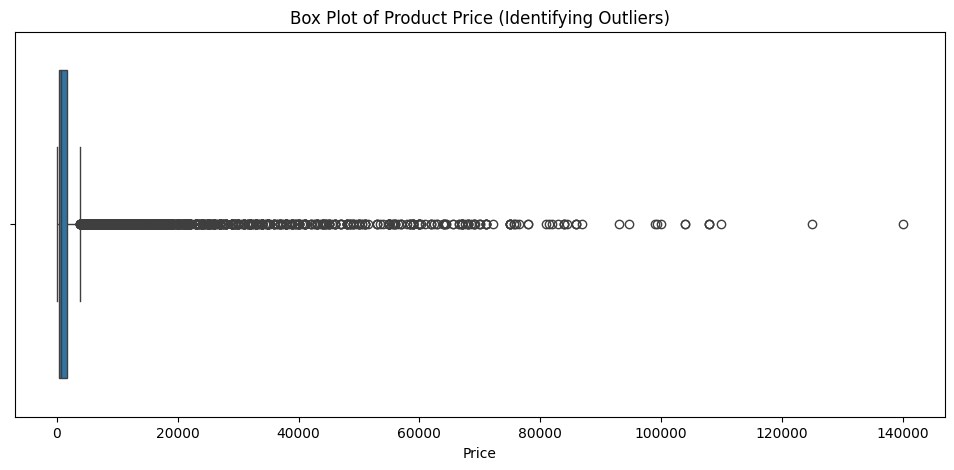

In [13]:
plt.figure(figsize=(12, 5))
sns.boxplot(x=df['Price'])
plt.title('Box Plot of Product Price (Identifying Outliers)')
plt.show()
# Repeat for 'Review_Count'

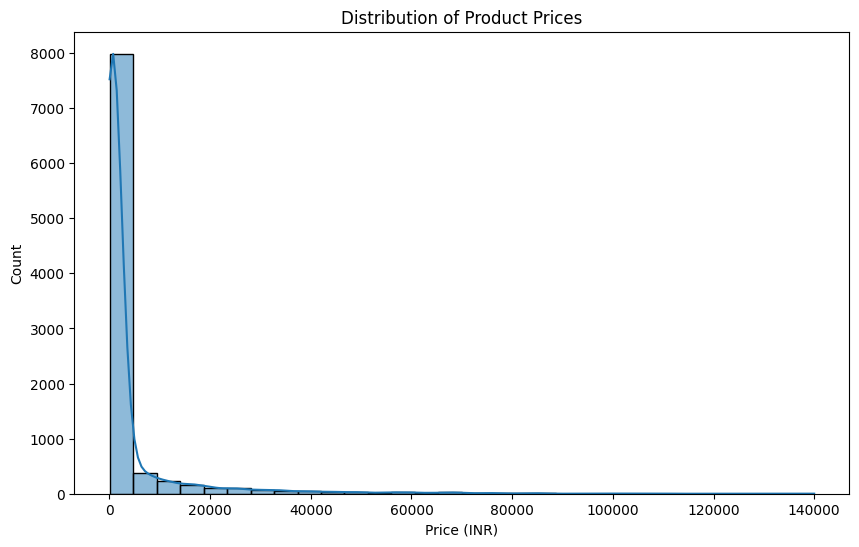

In [14]:
# --- Visualization 1: Price Distribution ---
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title("Distribution of Product Prices")
plt.xlabel('Price (INR)')
plt.show()


--- Correlation Matrix ---
                 Price    Rating  Review_Count
Price         1.000000  0.059969     -0.059803
Rating        0.059969  1.000000      0.008208
Review_Count -0.059803  0.008208      1.000000


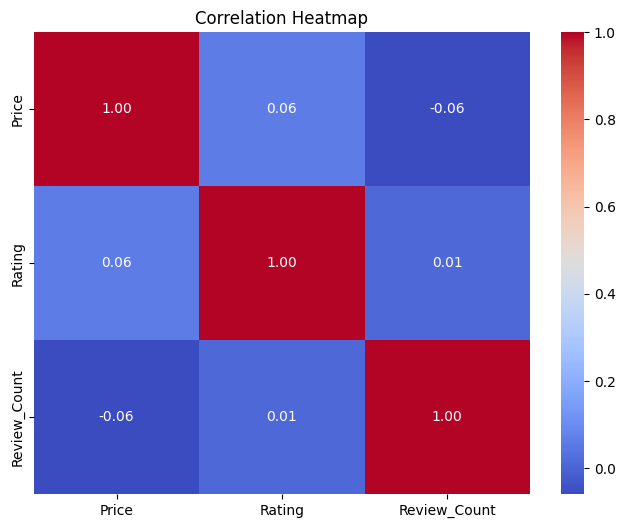

In [15]:
# --- Visualization 2: Relationship between Price, Rating, and Reviews ---
correlation_matrix = df[['Price', 'Rating', 'Review_Count']].corr()
print("\n--- Correlation Matrix ---")
print(correlation_matrix)

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

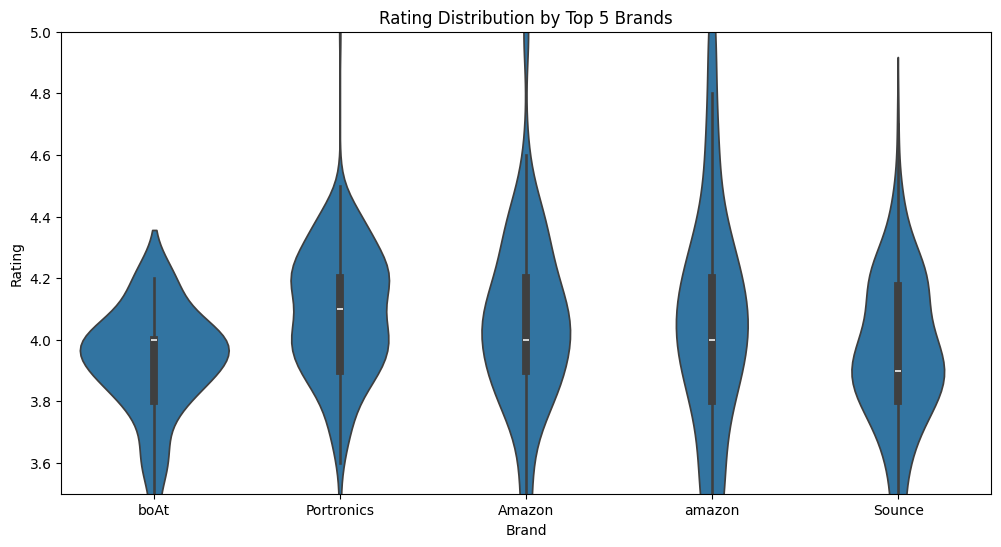

In [16]:
# --- Visualization 3: Performance by Brand (using a violin plot) ---
top_brands = df['Brand'].value_counts().head(5).index
df_top = df[df['Brand'].isin(top_brands)]

plt.figure(figsize=(12,6))
sns.violinplot(x='Brand', y='Rating', data=df_top)
plt.title('Rating Distribution by Top 5 Brands')
plt.ylim(3.5, 5.0)
plt.show()

In [17]:
# print("All features and the target variable have been applied to the Dataframe.")
# print("\nCheck Target Distribution:")
# print(df['Is_High_Performer'].value_counts(normalize=True))

In [18]:
df.to_csv('../data/processed_data.csv', index=False)
print("\nProcessed data saved to processed_data.csv")


Processed data saved to processed_data.csv
